<a id = "division_ID"></a>

# Properati Project

This project was part of my final work done for Digital House bootcamp. The only rule for the project as to apply all the concepts we learned (when nessesary of course) in a dataset that is somewhat complex. Not a titanic dataset for example, but something that challenges you.

I've decided to use a dataset of Properati to predict the prices of houses in my city. At the moment of this project i was looking for a new place to live in Capital Federal, Argentina, so i find it quite intresting to do my project regarding this matter. I was curious as of what determines the prices of houses in this city, as well as see how much the price affects other variables, for example the length of the description or the most common words used in the titles, etc.

The project is divided into five notebooks :
- The first notebook is about preparing the data for further analysis. The dataset has a lot of nulls and outliers, so i tried to fix this issues.
- The second notebook is the analysis of the data. I made some plots that i think represent the data well.
- In the third notebook i divided the observations into clusters and add this clusters as features, and then trained different models.
- In the fourth notebook i created a Flask API to implement my model. The api transforms the data and returns the price prediction.
- The last notebook is just the the test for the API, making requests with different features and getting the prediction.

<a id = "menu"></a>


1. [Brief Description of Dataset](#infobasica)


2. [Fixing USD Prices Issues](#fillnull)\
&emsp; [Merging Palermos](#palermo)\
&emsp; [Filling Target Nulls](#usd)\
&emsp; [Filling Surface Nulls based on covered surface](#surface)\
&emsp; [Filling Rooms Nulls based on description](#rooms)


3. [Creating more features](#features)

In [8]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import  matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv ("properati.csv").drop(columns = "Unnamed: 0")

<a id = "infobasica"></a>
[Return to Menu](#menu)
#### Dataset Description

In this section i wanted to see what was i dealing with. Nulls, frecuency and descriptive statistics of each feature, dropping columns i am not working with, etc.


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

In [11]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [12]:
#large ammount of nulls
data.isnull().sum()/data.shape[0]

operation                     0.000000
property_type                 0.000000
place_name                    0.000190
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.154405
lat-lon                       0.425260
lat                           0.425260
lon                           0.425260
price                         0.168372
currency                      0.168380
price_aprox_local_currency    0.168372
price_aprox_usd               0.168372
surface_total_in_m2           0.324435
surface_covered_in_m2         0.164222
price_usd_per_m2              0.433947
price_per_m2                  0.276869
floor                         0.934837
rooms                         0.609058
expenses                      0.882346
properati_url                 0.000000
description                   0.000016
title                         0.000000
image_thumbnail               0.025672
dtype: float64

In [13]:
data = data[data.state_name == "Capital Federal"]

In [14]:
#explore occurrences in each feature
for i in data.drop(columns = ["geonames_id",'lat-lon','lon',"price","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","expenses","properati_url","description","title","image_thumbnail","place_with_parent_names"]):
    print (i.upper() + "\n")
    print(data[i].value_counts())
    print("-" * 100 + "\n")

OPERATION

sell    32316
Name: operation, dtype: int64
----------------------------------------------------------------------------------------------------

PROPERTY_TYPE

apartment    27037
house         2087
PH            1828
store         1364
Name: property_type, dtype: int64
----------------------------------------------------------------------------------------------------

PLACE_NAME

Belgrano           2992
Palermo            2885
Caballito          2273
Villa Urquiza      1629
Recoleta           1547
                   ... 
Velez Sarsfield      39
Villa Real           37
Villa Soldati        15
Villa Riachuelo       6
Catalinas             4
Name: place_name, Length: 62, dtype: int64
----------------------------------------------------------------------------------------------------

COUNTRY_NAME

Argentina    32316
Name: country_name, dtype: int64
----------------------------------------------------------------------------------------------------

STATE_NAME

Capital Federal

In [15]:
data.drop(columns = ["operation","place_with_parent_names","country_name","lat-lon","floor","expenses","properati_url","image_thumbnail","state_name"],inplace = True)

<a id = "fillnull"></a>

#### Some data manipulation

As we could see in the previous section, the amount of nulls is great.
I tried to fill nulls based on other features, as well as using some simple imputations.

First i merged all the Palermo variations from place_name to only one palermo\
Then i filled USD prices with another feature, this will be my target variable\
Third i filled total surface nulls using the covered surface column, assuming that if the total surface is null but it has the covered surface, then the minimun total surface will be the covered surface. I also created a feature named uncovered surface, substracting covered surface from total surface\
Lastly i filled the rooms columns. I used regex to get room information from the descriptions of each property.  

[Return to Menu](#menu)



<a id = "palermo"></a>
Here i merge all Palermos in one Palermo.

In [16]:
patern_palermo = r'\.*Palermo Chico\.*|\.*Palermo Hollywood\.*|\.*Palermo Soho\.*|\.*Palermo Viejo\.*'
patern_palermo_regex = re.compile(patern_palermo,re.IGNORECASE)
Palermo_Column = data.place_name.apply(lambda x: x if x is np.NaN else patern_palermo_regex.sub('Palermo',x))
data["Place_Name_Ok"] = Palermo_Column

In [17]:
def Rellenar_NaN (data,serie,nombre_columna,columna_fill):
    'creates new column with a new serie. NaNs are filled with another column from the same dataFrame'
    data["temporal"] = serie
    data[nombre_columna] = data["temporal"].fillna(data[columna_fill])
    data.drop("temporal",axis=1,inplace = True)

<a id = "usd"></a>

Here i fill USD prices using the median of prices as well as price_aprox_usd and price columns\
Finally i remove some outliers.

In [18]:
#Fill USD Prices 
mask_ARS = data.currency == 'ARS'
Caba_Ars = data[['price','price_aprox_usd']][mask_ARS]                                  
variableTemporal = Caba_Ars.assign(price=data['price_aprox_usd'])["price"]
data["temporal"] = variableTemporal
variableTemporal_2 = data.temporal.fillna(data.price)
data["price_In_USD"] = variableTemporal_2
data.drop("temporal",axis = 1,inplace=True)

In [19]:
data.price_In_USD.fillna(value = data.price_In_USD.median(),inplace = True)

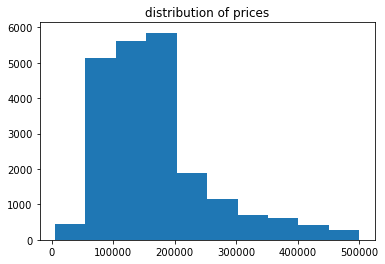

In [53]:
plt.hist(data.price_In_USD[data.price_In_USD < 500000])
plt.title('Distribution of prices');

In [21]:
print(data.price_In_USD.max())
print(data.price_In_USD.min())
print(data.price_In_USD.mean())
print(data.price_In_USD.median())

46545445.0
5103.61
258168.95052327024
157284.0


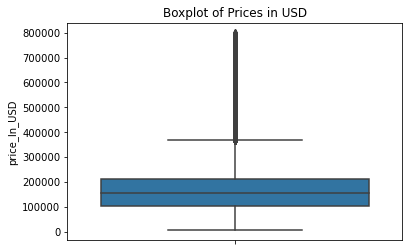

In [55]:
sns.boxplot(y = data.price_In_USD[data.price_In_USD < 800000]).set_title("Boxplot of Prices in USD");

In [23]:
#remove some outliers
data = data[data.price_In_USD < 800000]

In [24]:
data.drop(columns = ["price","currency","price_aprox_local_currency","price_aprox_usd","price_usd_per_m2","price_per_m2","place_name"],inplace = True)

<a id = "surface"></a>

Here i simply fill surface with covered surface and imputations, as well as removing some outliers

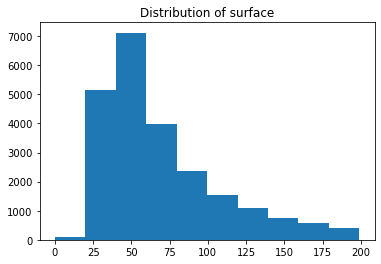

In [56]:
plt.hist(data.surface_total_in_m2[data.surface_total_in_m2 < 500])
plt.title("Distribution of surface");

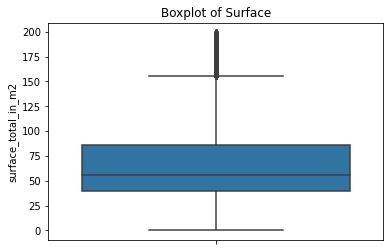

In [57]:
sns.boxplot(y = data.surface_total_in_m2[data.surface_total_in_m2 < 200]).set_title("Boxplot of Surface");

In [29]:
#remove outliers
data = data[data.surface_total_in_m2 < 200]

In [31]:
data.surface_covered_in_m2.fillna(data.surface_total_in_m2.mean(),inplace = True)

In [32]:
#create new feature called uncovered Surface
data["uncovered_surface"] = (data.surface_total_in_m2 - data.surface_covered_in_m2)

In [33]:
data.uncovered_surface[data.uncovered_surface < 0] = 0

<a id = "rooms"></a>

Here i used regex to fill Rooms Nulls.\
I used regex to find both numeric and written values in descriptions.

In [34]:
patern_rooms_numericos = '(?P<ambientes>\\d+\s?amb|\d+\s?ambientes)'
regex_rooms_numericos = re.compile(patern_rooms_numericos,flags=re.IGNORECASE)
matches_rooms_numericos = data.title.apply(lambda x: x if x is np.NaN else regex_rooms_numericos.search(x))
matches_rooms_numericos.fillna(0,inplace=True)
maskRooms = matches_rooms_numericos != 0
SinNullRoomsNumericos = matches_rooms_numericos[maskRooms]
SerieRooms = SinNullRoomsNumericos.apply(lambda x: x.group('ambientes'))
PatternEraseAmb = '\s?ambiente|\s?amb'
cadena_reemplazo = ""
PatternEraseAmb_regex = re.compile (PatternEraseAmb,flags=re.IGNORECASE)
SerieRoomsNumericaLimpia = SerieRooms.apply(lambda x: PatternEraseAmb_regex.sub(cadena_reemplazo, x)).astype(int)

In [35]:
Dic_rooms = {'Mono' : 1,'Un' : 1 ,'Dos' : 2 , 'Tres' : 3, "Cuatro"  : 4 , "Cinco" : 5 , "Seis" : 6 , 'Siete' : 7 , "Ocho" : 8, "Nueve" : 9 , "Diez" : 10}
data.title
patern_rooms_writen = '(?P<ambientes_W>\\s[a-z]*\samb\s?|\s[a-z]*\sambientes\s?|\s?monoambiente\s?)'
regex_patern_rooms_writen = re.compile(patern_rooms_writen,flags=re.IGNORECASE)
matches_rooms_written = data.title.apply(lambda x: x if x is np.NaN else regex_patern_rooms_writen.search(x))
matches_rooms_written.fillna(0,inplace=True)
maskRoomsWritten = matches_rooms_written != 0
SinNullRoomsWritten = matches_rooms_written[maskRoomsWritten]
SerieRoomsWritten = SinNullRoomsWritten.apply(lambda x: x.group('ambientes_W'))
PatternEraseAmbWritten = '\s?ambiente|\s?amb'
cadena_reemplazo = ""
PatternEraseAmbWritten_regex = re.compile (PatternEraseAmbWritten)
SerieRoomsWrittenLimpia = SerieRoomsWritten.apply(lambda x: PatternEraseAmb_regex.sub(cadena_reemplazo, x))
PatternEraseAmbWrittenEspacio = ' *'
PatternEraseAmbWrittenEspacio_regex = re.compile (PatternEraseAmbWrittenEspacio,flags=re.IGNORECASE)
SerieRoomsWrittenLimpiaSinEspacios = SerieRoomsWrittenLimpia.apply(lambda x: PatternEraseAmbWrittenEspacio_regex.sub(cadena_reemplazo, x))

In [36]:
#replace strings with values

Serie_Cap = SerieRoomsWrittenLimpiaSinEspacios.str.capitalize()
for x, y in Dic_rooms.items():
    Serie_Cap = Serie_Cap.replace(x, y)     

#stay only with numeric values

Pattern_Only_Digits = "(?P<numeros>\d+)"
Pattern_Only_Digits_regex = re.compile(Pattern_Only_Digits)
MatchesNumString = Serie_Cap.apply(str)
MatchesNum = MatchesNumString.apply(lambda x: x if x is np.NaN else Pattern_Only_Digits_regex.search(x))
MatchesNum.fillna(0,inplace = True)
maskRoomsWrittenNumbers = MatchesNum != 0
Sin_Null_Num_Written = MatchesNum[maskRoomsWrittenNumbers]
SerieRoomsWritten_Num = Sin_Null_Num_Written.apply(lambda x: x.group('numeros')).astype(int)

In [37]:
Rellenar_NaN (data,SerieRoomsNumericaLimpia,'Rooms_Clean','rooms')
Rellenar_NaN (data,SerieRoomsWritten_Num,'Rooms_Clean_Ok','Rooms_Clean')
data.drop('Rooms_Clean', axis = 1 , inplace = True)

In [38]:
data.drop(columns = ["rooms"],inplace = True)

In [40]:
#the rest filled with median
data.Rooms_Clean_Ok.fillna(value = data.Rooms_Clean_Ok.median(),inplace = True)

<a id = "features"></a>

#### More Features

Finally i add quite a few features from description, to see how they affect price in the next notebook

[Return to Menu](#menu)

In [42]:
data["cochera"] = data['description'].apply(lambda x: 1 if "cochera" in x.lower() or "garage" in x.lower() else 0 )

In [43]:
data["piscina"] = data['description'].apply(lambda x: 1 if "piscina" in x.lower() else 0 )

In [44]:
data["amenities"] = data['description'].apply(lambda x: 1 if "amenities" in x.lower() else 0 )

In [45]:
data["suite"] = data['description'].apply(lambda x: 1 if "suite" in x.lower() else 0 )

In [46]:
data["luminoso"] = data['description'].apply(lambda x: 1 if "luminoso" in x.lower() else 0 )

In [47]:
data["sin_expensas"] = data['description'].apply(lambda x: 1 if "sin expensas" in x.lower() else 0 )

In [48]:
data["apto_profesional"] = data['description'].apply(lambda x: 1 if "apto profesional" in x.lower() else 0 )

In [49]:
data["estrenar"] = data['description'].apply(lambda x: 1 if "a estrenar" in x.lower() else 0 )

In [50]:
data["contrafrente"] = data['description'].apply(lambda x: 1 if "contrafrente " in x.lower() else 0 )

In [51]:
data["credito_banco"] = data['description'].apply(lambda x: 1 if "apto crédito " in x.lower() else 0 )

In [76]:
data["len_description"] = data['description'].apply(lambda x: len(x) )

In [82]:
data.to_csv("Data_Clean.csv")